In [56]:
# -*- coding: UTF-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (precision_score, recall_score, f1_score)

In [66]:
# 准备数据
test_set = pd.read_csv('raw/TestSet.csv')
train_set = pd.read_csv('raw/TrainingSet.csv')

train = train_set.drop(['EbayID', 'QuantitySold', 'SellerName','EndDay'], axis=1)
train_target = train_set['QuantitySold']

n_trainSamples, n_features = train.shape


In [67]:
# 画出训练过程中SGDClassifier利用不同的mini_batch学习的效果
def plot_learning(clf, title):

    plt.figure(figsize=(10,6))
    # 记录上一次训练结果在本次batch上的预测情况
    validationScore = []
    # 记录加上本次batch训练结果后的预测情况
    trainScore = []
    # 最小训练批数
    mini_batch = 1000
    for idx in range(int(np.ceil(n_trainSamples / mini_batch))):
        i=idx * mini_batch
        j= min((idx + 1) * mini_batch, n_trainSamples)
        x_batch = train[i:j]
        y_batch = train_target[i:j]
        if idx > 0:
            validationScore.append(clf.score(x_batch, y_batch))
        clf.partial_fit(x_batch, y_batch, classes=range(5))
        if idx > 0:
            trainScore.append(clf.score(x_batch, y_batch))
    plt.plot(trainScore, label="train score")
    plt.plot(validationScore, label="validation socre")
    plt.xlabel("Mini_batch")
    plt.ylabel("Score")
    plt.legend(loc='best')
    plt.grid()
    plt.title(title)

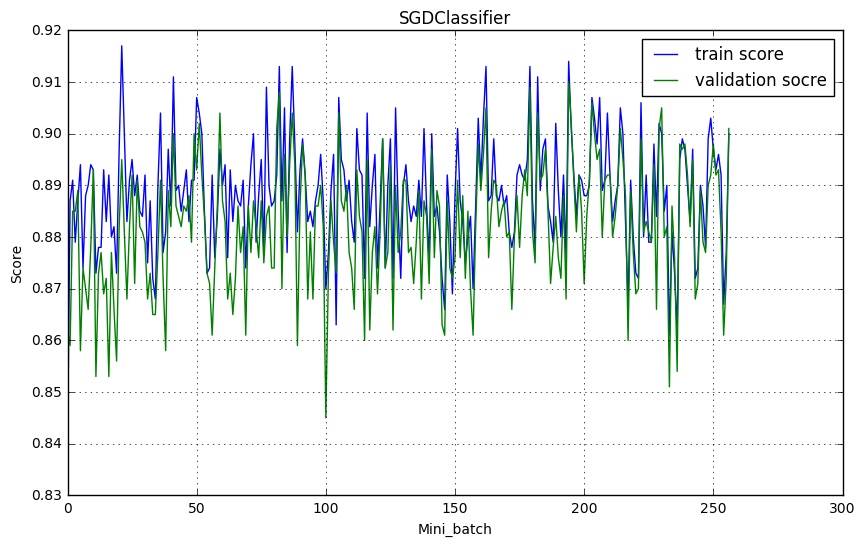

In [68]:
# 对数据进行归一化
scaler = StandardScaler()
train = scaler.fit_transform(train)
# 创建SGDClassifier
clf = SGDClassifier(penalty='l2', alpha=0.001)
plot_learning(clf, "SGDClassifier")

plt.show()

In [69]:
test=test_set.drop(['EbayID', 'QuantitySold', 'SellerName','EndDay'], axis=1)
test_target=test_set['QuantitySold']
test=scaler.fit_transform(test)
test_pre=clf.predict(test)

print("SGDClassifier 训练测试结果如下:" )
print("\tPrecision: %1.3f " % precision_score(test_target, test_pre))
print("\tRecall: %1.3f" % recall_score(test_target, test_pre))
print("\tF1: %1.3f \n" % f1_score(test_target, test_pre))

SGDClassifier 训练测试结果如下:
	Precision: 0.812 
	Recall: 0.738
	F1: 0.773 

